# TCC CIÊNCIA DE DADOS E BIG DATA - PUC MINAS

###### Dados a serem trabalhados
###### PC-MG: https://dados.mg.gov.br/dataset/violencia-contra-mulher/resource/f2957178-7f1d-4890-84af-a2aeb5e603fb 
###### IBGE: https://www.ibge.gov.br/cidades-e-estados/mg.html

### Tratamento de dados - PC CIVIL

In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


In [2]:
#Leitura do csv - Base da Polícia Civíl de Minas Gerais
df_pc = pd.read_csv('violencia_domestica_2022.csv', sep =";")


In [3]:
display(df_pc)

,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,3) Interior de MG,AMEACA,CONSUMADO,1.0
2,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
3,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1.0
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,3) Interior de MG,AMEACA,CONSUMADO,1.0
...,...,...,...,...,...,...,...,...,...,...
101867,317090,VARZELANDIA,2022-12-31,12,2022,11º Departamento - Montes Claros,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
101868,317120,VESPASIANO,2022-12-31,12,2022,3º Departamento - Vespasiano,2) RMBH (sem BH),ATEND. DENUNCIA INFRACOES CONTRA MULHER(VIOLEN...,CONSUMADO,1.0
101869,317130,VICOSA,2022-12-31,12,2022,4º Departamento - Juiz de Fora,3) Interior de MG,AMEACA,CONSUMADO,2.0
101870,317200,VISCONDE DO RIO BRANCO,2022-12-31,12,2022,4º Departamento - Juiz de Fora,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0


In [4]:
#Verificação de qual natureza de delito há maior frequência
df_pc["natureza_delito"].value_counts()

natureza_delito
AMEACA                                                28997
VIAS DE FATO / AGRESSAO                               20155
LESAO CORPORAL                                        16874
DESCUMPRIMENTO DE MEDIDA PROTETIVA DE URGENCIA         5570
ATEND. DENUNCIA INFRACOES CONTRA MULHER(VIOLENCIA      3444
                                                      ...  
FRUSTRA DIREITO ASSEGURADO NA LEI TRABALHISTA             1
ATENDIMENTO DE DENUNCIA DE INFRACOES ENVOLVENDO AR        1
CONCORRENCIA DESLEAL                                      1
CRUELDADE CONTRA ANIMAIS                                  1
FRAUDE PROCESSUAL                                         1
Name: count, Length: 188, dtype: int64

In [5]:
#Seleção das três maiores naturezas de delito:Lesão corporal, ameaça e vias de fato / agressão

df_pc = df_pc[df_pc['natureza_delito'].isin(['LESAO CORPORAL', 'AMEACA', 'VIAS DE FATO / AGRESSAO'])]

In [6]:
df_pc

,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,3) Interior de MG,AMEACA,CONSUMADO,1.0
2,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
3,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1.0
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,3) Interior de MG,AMEACA,CONSUMADO,1.0
...,...,...,...,...,...,...,...,...,...,...
101866,317070,VARGINHA,2022-12-31,12,2022,6º Departamento - Lavras,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1.0
101867,317090,VARZELANDIA,2022-12-31,12,2022,11º Departamento - Montes Claros,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
101869,317130,VICOSA,2022-12-31,12,2022,4º Departamento - Juiz de Fora,3) Interior de MG,AMEACA,CONSUMADO,2.0
101870,317200,VISCONDE DO RIO BRANCO,2022-12-31,12,2022,4º Departamento - Juiz de Fora,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0


In [7]:
# Quantidade de fatos consumados e tentados, sobre os três delitos selecionados
df_pc["tentado_consumado"].value_counts()

tentado_consumado
CONSUMADO    65473
TENTADO        553
Name: count, dtype: int64

In [8]:
#Exclusão de dados que contém fatos tentados, mantendo somentos os fatos consumados
df_pc = df_pc[df_pc['tentado_consumado'].isin(['CONSUMADO'])]

In [9]:
df_pc

,municipio_cod,municipio_fato,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,qtde_vitimas
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,3) Interior de MG,AMEACA,CONSUMADO,1.0
2,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
3,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1.0
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,3) Interior de MG,AMEACA,CONSUMADO,1.0
...,...,...,...,...,...,...,...,...,...,...
101866,317070,VARGINHA,2022-12-31,12,2022,6º Departamento - Lavras,3) Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1.0
101867,317090,VARZELANDIA,2022-12-31,12,2022,11º Departamento - Montes Claros,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0
101869,317130,VICOSA,2022-12-31,12,2022,4º Departamento - Juiz de Fora,3) Interior de MG,AMEACA,CONSUMADO,2.0
101870,317200,VISCONDE DO RIO BRANCO,2022-12-31,12,2022,4º Departamento - Juiz de Fora,3) Interior de MG,LESAO CORPORAL,CONSUMADO,1.0


In [10]:
# Tratamento de Dados da coluna "rmbh"
df_pc = df_pc.replace(["3) Interior de MG", "2) RMBH (sem BH)", "1) Belo Horizonte"], ["Interior de MG", "Região Metropolitana", "Belo Horizonte"])

In [11]:
# Renomeação de colunas
df_pc = df_pc.rename(columns={'qtde_vitimas                                                                ': 'Quantidade vítimas', 'municipio_fato' : 'Município'})

In [12]:
#tipos de dados por coluna
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65473 entries, 0 to 101871
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio_cod       65473 non-null  int64  
 1   Município           65473 non-null  object 
 2   data_fato           65473 non-null  object 
 3   mes                 65473 non-null  int64  
 4   ano                 65473 non-null  int64  
 5   risp                65473 non-null  object 
 6   rmbh                65473 non-null  object 
 7   natureza_delito     65473 non-null  object 
 8   tentado_consumado   65473 non-null  object 
 9   Quantidade vítimas  65473 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 5.5+ MB


In [13]:
#Transformando a coluna "Quantidade vítimas" em inteiro
df_pc['Quantidade vítimas'] = df_pc['Quantidade vítimas'].astype(np.int64)
df_pc

,municipio_cod,Município,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,Quantidade vítimas
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,Interior de MG,LESAO CORPORAL,CONSUMADO,1
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,Interior de MG,AMEACA,CONSUMADO,1
2,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,Interior de MG,LESAO CORPORAL,CONSUMADO,1
3,310030,ABRE-CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,Interior de MG,AMEACA,CONSUMADO,1
...,...,...,...,...,...,...,...,...,...,...
101866,317070,VARGINHA,2022-12-31,12,2022,6º Departamento - Lavras,Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
101867,317090,VARZELANDIA,2022-12-31,12,2022,11º Departamento - Montes Claros,Interior de MG,LESAO CORPORAL,CONSUMADO,1
101869,317130,VICOSA,2022-12-31,12,2022,4º Departamento - Juiz de Fora,Interior de MG,AMEACA,CONSUMADO,2
101870,317200,VISCONDE DO RIO BRANCO,2022-12-31,12,2022,4º Departamento - Juiz de Fora,Interior de MG,LESAO CORPORAL,CONSUMADO,1


In [14]:
#Função para tratamento da coluna "Municípios"
def corrigir_nome(nome):
  nome = nome.replace('Â','A').replace('Á','A').replace('Ã','A').replace('Ç','C').replace('É','E').replace('Ê','E').replace('Ó','O').replace('Ô','O').replace('Õ','O').replace('Í','I').replace('Ú','U').replace('-',' ').strip()
  return nome

In [15]:
df_pc['Município'] = df_pc['Município'].apply(corrigir_nome)

In [16]:
# Verificando se os registros são únicos
df_pc.columns.is_unique


True

In [17]:
# Verificando se os index são únicos
df_pc.index.is_unique

True

In [18]:
# Verificação de campos nulos
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65473 entries, 0 to 101871
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   municipio_cod       65473 non-null  int64 
 1   Município           65473 non-null  object
 2   data_fato           65473 non-null  object
 3   mes                 65473 non-null  int64 
 4   ano                 65473 non-null  int64 
 5   risp                65473 non-null  object
 6   rmbh                65473 non-null  object
 7   natureza_delito     65473 non-null  object
 8   tentado_consumado   65473 non-null  object
 9   Quantidade vítimas  65473 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 7.5+ MB


In [19]:
df_pc

,municipio_cod,Município,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,Quantidade vítimas
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,Interior de MG,LESAO CORPORAL,CONSUMADO,1
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,Interior de MG,AMEACA,CONSUMADO,1
2,310030,ABRE CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,Interior de MG,LESAO CORPORAL,CONSUMADO,1
3,310030,ABRE CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,Interior de MG,AMEACA,CONSUMADO,1
...,...,...,...,...,...,...,...,...,...,...
101866,317070,VARGINHA,2022-12-31,12,2022,6º Departamento - Lavras,Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1
101867,317090,VARZELANDIA,2022-12-31,12,2022,11º Departamento - Montes Claros,Interior de MG,LESAO CORPORAL,CONSUMADO,1
101869,317130,VICOSA,2022-12-31,12,2022,4º Departamento - Juiz de Fora,Interior de MG,AMEACA,CONSUMADO,2
101870,317200,VISCONDE DO RIO BRANCO,2022-12-31,12,2022,4º Departamento - Juiz de Fora,Interior de MG,LESAO CORPORAL,CONSUMADO,1


### Análise Exploratória de Dados - POLÍCIA CIVIL

In [20]:
# Ocorrências por Departamento de Polícias
df_pc["risp"].value_counts()

risp
12º Departamento - Ipatinga               6611
4º Departamento - Juiz de Fora            5013
2º Departamento - Contagem                4740
7º Departamento - Divinópolis             4667
11º Departamento - Montes Claros          4594
18º Departamento - Poços de Caldas        4410
3º Departamento - Vespasiano              3711
6º Departamento - Lavras                  3691
5º Departamento - Uberaba                 3478
13º Departamento - Barbacena              3460
17º Departamento - Pouso Alegre           3285
15º Departamento - Teófilo Otoni          3214
14º Departamento - Curvelo                2975
8º Departamento - Governador Valadares    2737
9º Departamento - Uberlândia              2324
10º Departamento - Patos de Minas         2230
19º Departamento - Sete Lagoas            1786
16º Departamento - Unaí                   1458
1º Departamento - Belo Horizonte          1089
Name: count, dtype: int64

In [21]:
#Ocorrências no ano de 2022 sobre os departamentos
departamento = df_pc.assign(Ocorrências=df_pc['risp'].map(df_pc['risp'].value_counts()))
departamento

,municipio_cod,Município,data_fato,mes,ano,risp,rmbh,natureza_delito,tentado_consumado,Quantidade vítimas,Ocorrências
0,310010,ABADIA DOS DOURADOS,2022-01-01,1,2022,10º Departamento - Patos de Minas,Interior de MG,LESAO CORPORAL,CONSUMADO,1,2230
1,310020,ABAETE,2022-01-01,1,2022,7º Departamento - Divinópolis,Interior de MG,AMEACA,CONSUMADO,1,4667
2,310030,ABRE CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,Interior de MG,LESAO CORPORAL,CONSUMADO,1,6611
3,310030,ABRE CAMPO,2022-01-01,1,2022,12º Departamento - Ipatinga,Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1,6611
4,310090,AGUAS FORMOSAS,2022-01-01,1,2022,15º Departamento - Teófilo Otoni,Interior de MG,AMEACA,CONSUMADO,1,3214
...,...,...,...,...,...,...,...,...,...,...,...
101866,317070,VARGINHA,2022-12-31,12,2022,6º Departamento - Lavras,Interior de MG,VIAS DE FATO / AGRESSAO,CONSUMADO,1,3691
101867,317090,VARZELANDIA,2022-12-31,12,2022,11º Departamento - Montes Claros,Interior de MG,LESAO CORPORAL,CONSUMADO,1,4594
101869,317130,VICOSA,2022-12-31,12,2022,4º Departamento - Juiz de Fora,Interior de MG,AMEACA,CONSUMADO,2,5013
101870,317200,VISCONDE DO RIO BRANCO,2022-12-31,12,2022,4º Departamento - Juiz de Fora,Interior de MG,LESAO CORPORAL,CONSUMADO,1,5013


<Axes: xlabel='Ocorrências', ylabel='risp'>

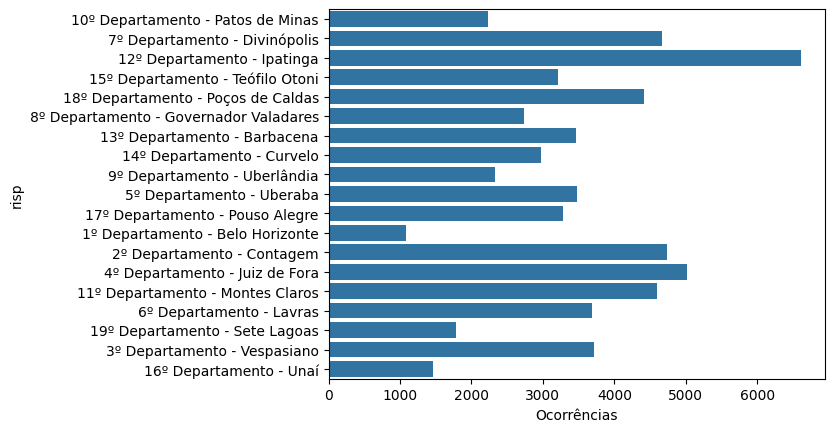

In [22]:
#Plotagem de gráfico = Ocorrências por departamento
sns.barplot(x=departamento["Ocorrências"], y = departamento["risp"])

In [23]:
# Total de Ocorrências entre os Departamentos de Polícia
df_pc["risp"].value_counts().sum()

65473

In [24]:
#Comparativo entre as regiões das ocorrências
df_pc["rmbh"].value_counts()

rmbh
Interior de MG          56340
Região Metropolitana     8044
Belo Horizonte           1089
Name: count, dtype: int64

In [25]:
#Número de ocorrência por município, Belo Horizonte lidera o topo.
df_pc["Município"].value_counts()

Município
BELO HORIZONTE             1089
JUIZ DE FORA                993
UBERLANDIA                  939
CONTAGEM                    937
MONTES CLAROS               871
                           ... 
PEDRO TEIXEIRA                2
SANTA RITA DE JACUTINGA       2
PASSABEM                      1
TOCOS DO MOJI                 1
ALAGOA                        1
Name: count, Length: 852, dtype: int64

<Axes: xlabel='Município', ylabel='Count'>

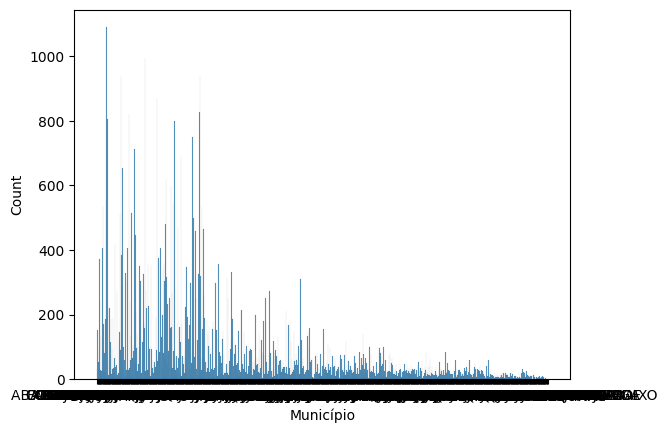

In [26]:
#Histograma - Ocorrência por cidades
sns.histplot(x=df_pc["Município"], binwidth=15)

In [27]:
# Soma de vítimas para cada município 
df_pc = df_pc.groupby(['Município'])['Quantidade vítimas'].sum().reset_index()

In [28]:
df_pc.sort_values(by='Quantidade vítimas', ascending=False).reset_index()

,index,Município,Quantidade vítimas
0,65,BELO HORIZONTE,10714
1,418,JUIZ DE FORA,3217
2,205,CONTAGEM,2693
3,823,UBERLANDIA,2627
4,500,MONTES CLAROS,2174
...,...,...,...
847,113,CAMACHO,2
848,209,CORDISLANDIA,2
849,558,PASSABEM,1
850,809,TOCOS DO MOJI,1


In [29]:
#Descrição da Coluna " Quantidade vítimas".
#Podemos observar como destaque os quartis e a média
df_pc.describe()

,Quantidade vítimas
count,852.000000
mean,115.899061
std,448.596856
min,1.000000
25%,16.000000
50%,32.000000
75%,76.250000
max,10714.000000


### Tratamento de dados do IBGE 

In [30]:
#Leitura do csv - Base do IBGE
df_ibge = pd.read_excel('Municípios_MG.xlsx', engine='openpyxl', skiprows = 2)

In [31]:
df_ibge

,Município,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022]
0,Abadia dos Dourados,880.461,6272,7.12
1,Abaeté,1817.067,22675,12.48
2,Abre Campo,470.551,13927,29.60
3,Acaiaca,101.886,3909,38.37
4,Açucena,815.422,8943,10.97
...,...,...,...,...
848,Virginópolis,439.878,10314,23.45
849,Virgolândia,281.022,4552,16.20
850,Visconde do Rio Branco,243.351,39160,160.92
851,Volta Grande,205.552,4443,21.61


In [32]:
#Correção de nomes
df_ibge['Município'] = df_ibge['Município'].str.upper().apply(corrigir_nome)

In [33]:
#Observa-se que a base de dados oriunda da PC MG possui um município a menos que a base do IBGE 
df_ibge

,Município,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022]
0,ABADIA DOS DOURADOS,880.461,6272,7.12
1,ABAETE,1817.067,22675,12.48
2,ABRE CAMPO,470.551,13927,29.60
3,ACAIACA,101.886,3909,38.37
4,ACUCENA,815.422,8943,10.97
...,...,...,...,...
848,VIRGINOPOLIS,439.878,10314,23.45
849,VIRGOLANDIA,281.022,4552,16.20
850,VISCONDE DO RIO BRANCO,243.351,39160,160.92
851,VOLTA GRANDE,205.552,4443,21.61


In [34]:
#Verificação de campos nulos
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Município                               853 non-null    object 
 1   Área Territorial - km² [2022]           853 non-null    float64
 2   População residente - pessoas [2022]    853 non-null    int64  
 3   Densidade demográfica - hab/km² [2022]  853 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 26.8+ KB


In [35]:
df_ibge.isnull().sum()

Município                                 0
Área Territorial - km² [2022]             0
População residente - pessoas [2022]      0
Densidade demográfica - hab/km² [2022]    0
dtype: int64

In [36]:
df_pc.dtypes

Município             object
Quantidade vítimas     int64
dtype: object

In [37]:
df_ibge.dtypes

Município                                  object
Área Territorial - km² [2022]             float64
População residente - pessoas [2022]        int64
Densidade demográfica - hab/km² [2022]    float64
dtype: object

### Análise Exploratória de Dados IBGE

In [38]:
df_ibge

,Município,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022]
0,ABADIA DOS DOURADOS,880.461,6272,7.12
1,ABAETE,1817.067,22675,12.48
2,ABRE CAMPO,470.551,13927,29.60
3,ACAIACA,101.886,3909,38.37
4,ACUCENA,815.422,8943,10.97
...,...,...,...,...
848,VIRGINOPOLIS,439.878,10314,23.45
849,VIRGOLANDIA,281.022,4552,16.20
850,VISCONDE DO RIO BRANCO,243.351,39160,160.92
851,VOLTA GRANDE,205.552,4443,21.61


In [39]:
#Descrição dos dados do IBGE
df_ibge.describe()

,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022]
count,853.000000,8.530000e+02,853.000000
mean,687.589673,2.407822e+04,69.078441
std,965.848936,9.435155e+04,314.398490
min,3.565000,8.330000e+02,1.210000
25%,196.735000,4.639000e+03,12.170000
50%,363.828000,8.048000e+03,22.090000
75%,727.894000,1.728500e+04,43.760000
max,10727.097000,2.315560e+06,6988.180000


<Axes: xlabel='Município', ylabel='Área Territorial - km² [2022]'>

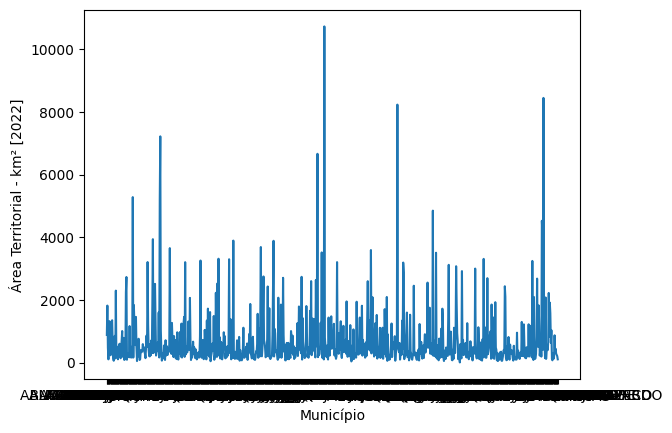

In [40]:
#Grafico de linha - Área Territorial
sns.lineplot(x = df_ibge["Município"], y = df_ibge["Área Territorial - km² [2022]"])

<Axes: xlabel='Município', ylabel='Área Territorial - km² [2022]'>

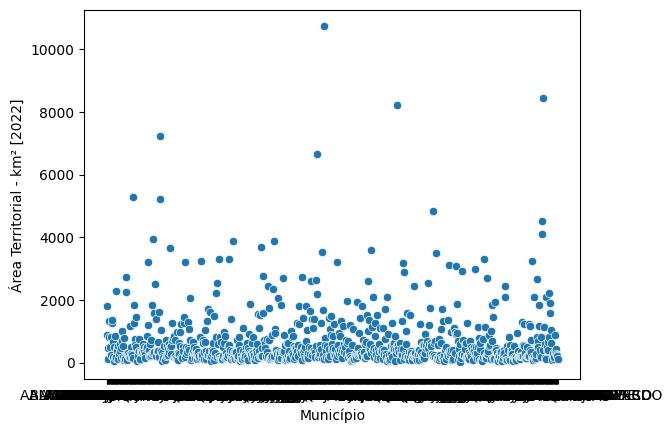

In [41]:
#Grafico de pontos - Área Territorial
sns.scatterplot(data =df_ibge, x = df_ibge["Município"], y = df_ibge["Área Territorial - km² [2022]"])

<Axes: xlabel='Município', ylabel='População residente - pessoas [2022]'>

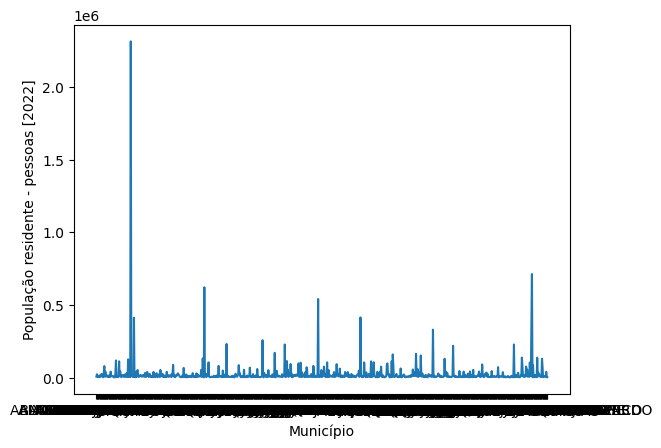

In [42]:
#Grafico de linha - População residente
sns.lineplot(x = df_ibge["Município"], y = df_ibge["População residente - pessoas [2022]"])

<Axes: xlabel='Município', ylabel='População residente - pessoas [2022]'>

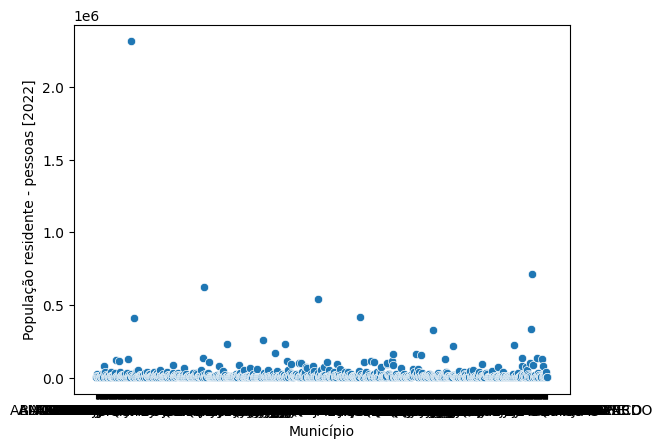

In [43]:
#Grafico de pontos - População residente
sns.scatterplot(data =df_ibge, x = df_ibge["Município"], y = df_ibge["População residente - pessoas [2022]"])

<Axes: xlabel='Município', ylabel='Densidade demográfica - hab/km² [2022]'>

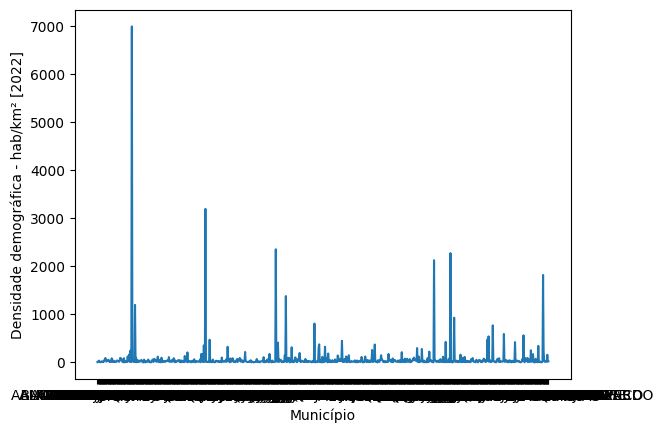

In [44]:
#Gráfico de linhas = Densidade demográfica
sns.lineplot(x = df_ibge["Município"], y = df_ibge["Densidade demográfica - hab/km² [2022]"])

<Axes: xlabel='Município', ylabel='Densidade demográfica - hab/km² [2022]'>

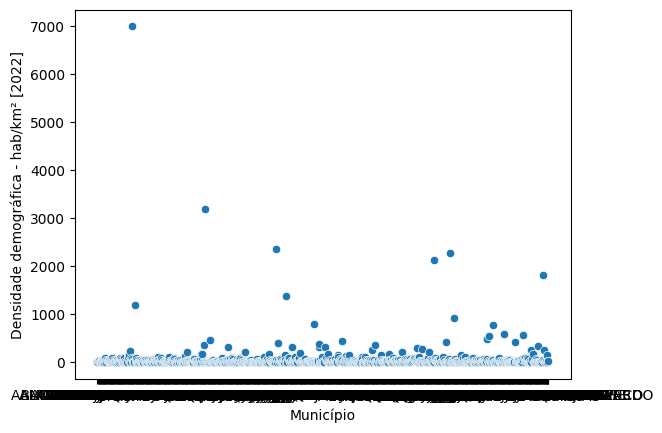

In [45]:
#Gráfico de linhas = Densidade demográfica
sns.scatterplot(data =df_ibge, x = df_ibge["Município"], y = df_ibge["Densidade demográfica - hab/km² [2022]"])

### Sanando problema com MERGE entre as duas tabelas

In [46]:
#Realização de comparativos relacionados a coluna "Municípios", pois houve conflito ao relizar o merge. Havendo a necessidade de compará-los ara eventual correção ortográfica para eventual correção ortográfica.


In [47]:
df = pd.merge(df_pc,df_ibge, on = "Município", how = "left")

In [48]:
df2 = pd.merge(df_ibge,df_pc, on = "Município", how = "left")

In [49]:
df.isnull().sum()

Município                                  0
Quantidade vítimas                         0
Área Territorial - km² [2022]             11
População residente - pessoas [2022]      11
Densidade demográfica - hab/km² [2022]    11
dtype: int64

In [50]:
df2.isnull().sum()

Município                                  0
Área Territorial - km² [2022]              0
População residente - pessoas [2022]       0
Densidade demográfica - hab/km² [2022]     0
Quantidade vítimas                        12
dtype: int64

In [51]:
#Dataframe gerado pelos dados da PC-CIVIl

df = df[df["Área Territorial - km² [2022]"].isnull()]

In [52]:
df

,Município,Quantidade vítimas,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022]
27,AMPARO DA SERRA,32,NaN,NaN,NaN
59,BARAO DO MONTE ALTO,20,NaN,NaN,NaN
94,BRASOPOLIS,32,NaN,NaN,NaN
139,CAPITAO ENEIAS,110,NaN,NaN,NaN
256,DONA EUSEBIA,19,NaN,NaN,NaN
534,ONCA DO PITANGUI,6,NaN,NaN,NaN
682,SANTA RITA DO IBITIPOCA,10,NaN,NaN,NaN
725,SAO JOAO BATISTA GLORIA,31,NaN,NaN,NaN
755,SAO SEB.DO RIO PRETO,5,NaN,NaN,NaN
756,SAO SEBAST. DO MARANHAO,34,NaN,NaN,NaN


In [53]:
# Dataframe gerado pelos dados da IBGE
df2 = df2[df2["Quantidade vítimas"].isnull()]

In [54]:
df2

,Município,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Quantidade vítimas
26,AMPARO DO SERRA,136.186,4541,33.34,NaN
59,BARAO DE MONTE ALTO,198.313,4964,25.03,NaN
95,BRAZOPOLIS,367.688,14246,38.74,NaN
138,CAPITAO ENEAS,971.576,14108,14.52,NaN
255,DONA EUZEBIA,70.231,6093,86.76,NaN
533,ONCA DE PITANGUI,246.976,2969,12.02,NaN
692,SANTA RITA DE IBITIPOCA,324.234,3301,10.18,NaN
724,SAO JOAO BATISTA DO GLORIA,547.908,7652,13.97,NaN
757,SAO SEBASTIAO DO MARANHAO,517.830,10079,19.46,NaN
759,SAO SEBASTIAO DO PARAISO,814.925,71796,88.10,NaN


In [55]:
#Lista dos Municípios (contém erros ortográficos) 
df["Município"].tolist()



['AMPARO DA SERRA',
 'BARAO DO MONTE ALTO',
 'BRASOPOLIS',
 'CAPITAO ENEIAS',
 'DONA EUSEBIA',
 'ONCA DO PITANGUI',
 'SANTA RITA DO IBITIPOCA',
 'SAO JOAO BATISTA GLORIA',
 'SAO SEB.DO RIO PRETO',
 'SAO SEBAST. DO MARANHAO',
 'SAO SEBASTIAO PARAISO']

In [56]:
df

,Município,Quantidade vítimas,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022]
27,AMPARO DA SERRA,32,NaN,NaN,NaN
59,BARAO DO MONTE ALTO,20,NaN,NaN,NaN
94,BRASOPOLIS,32,NaN,NaN,NaN
139,CAPITAO ENEIAS,110,NaN,NaN,NaN
256,DONA EUSEBIA,19,NaN,NaN,NaN
534,ONCA DO PITANGUI,6,NaN,NaN,NaN
682,SANTA RITA DO IBITIPOCA,10,NaN,NaN,NaN
725,SAO JOAO BATISTA GLORIA,31,NaN,NaN,NaN
755,SAO SEB.DO RIO PRETO,5,NaN,NaN,NaN
756,SAO SEBAST. DO MARANHAO,34,NaN,NaN,NaN


In [57]:
#Lista dos Municípios
df2["Município"].tolist()


['AMPARO DO SERRA',
 'BARAO DE MONTE ALTO',
 'BRAZOPOLIS',
 'CAPITAO ENEAS',
 'DONA EUZEBIA',
 'ONCA DE PITANGUI',
 'SANTA RITA DE IBITIPOCA',
 'SAO JOAO BATISTA DO GLORIA',
 'SAO SEBASTIAO DO MARANHAO',
 'SAO SEBASTIAO DO PARAISO',
 'SAO SEBASTIAO DO RIO PRETO',
 'SERRA DA SAUDADE']

In [58]:
df2

,Município,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022],Quantidade vítimas
26,AMPARO DO SERRA,136.186,4541,33.34,NaN
59,BARAO DE MONTE ALTO,198.313,4964,25.03,NaN
95,BRAZOPOLIS,367.688,14246,38.74,NaN
138,CAPITAO ENEAS,971.576,14108,14.52,NaN
255,DONA EUZEBIA,70.231,6093,86.76,NaN
533,ONCA DE PITANGUI,246.976,2969,12.02,NaN
692,SANTA RITA DE IBITIPOCA,324.234,3301,10.18,NaN
724,SAO JOAO BATISTA DO GLORIA,547.908,7652,13.97,NaN
757,SAO SEBASTIAO DO MARANHAO,517.830,10079,19.46,NaN
759,SAO SEBASTIAO DO PARAISO,814.925,71796,88.10,NaN


In [59]:
# O Município Serra da Saudade não se encontra na base da PC-MG

In [60]:
#função para correção de nomes, utilizando a base do IBGE como referência
def corrigir_nome2(nome):
    nome = nome.replace('AMPARO DA SERRA', 'AMPARO DO SERRA').replace('BARAO DO MONTE ALTO','BARAO DE MONTE ALTO').replace('BRASOPOLIS','BRAZOPOLIS').replace('CAPITAO ENEIAS','CAPITAO ENEAS').replace('DONA EUSEBIA','DONA EUZEBIA').replace( 'ONCA DO PITANGUI','ONCA DE PITANGUI').replace('SANTA RITA DO IBITIPOCA','SANTA RITA DE IBITIPOCA').replace('SAO JOAO BATISTA GLORIA','SAO JOAO BATISTA DO GLORIA').replace('SAO SEB.DO RIO PRETO','SAO SEBASTIAO DO RIO PRETO').replace('SAO SEBAST. DO MARANHAO','SAO SEBASTIAO DO MARANHAO').replace('SAO SEBASTIAO PARAISO','SAO SEBASTIAO DO PARAISO')
    return nome

    

In [61]:
df_pc = df_pc.apply(corrigir_nome2)

In [62]:
df_final = pd.merge(df_pc,df_ibge, on = "Município")

In [63]:
df_final

,Município,Quantidade vítimas,Área Territorial - km² [2022],População residente - pessoas [2022],Densidade demográfica - hab/km² [2022]
0,ABADIA DOS DOURADOS,33,880.461,6272,7.12
1,ABAETE,169,1817.067,22675,12.48
2,ABRE CAMPO,58,470.551,13927,29.60
3,ACAIACA,16,101.886,3909,38.37
4,ACUCENA,26,815.422,8943,10.97
...,...,...,...,...,...
847,VIRGINOPOLIS,45,439.878,10314,23.45
848,VIRGOLANDIA,3,281.022,4552,16.20
849,VISCONDE DO RIO BRANCO,218,243.351,39160,160.92
850,VOLTA GRANDE,18,205.552,4443,21.61


In [64]:
df_final.isnull().sum()

Município                                 0
Quantidade vítimas                        0
Área Territorial - km² [2022]             0
População residente - pessoas [2022]      0
Densidade demográfica - hab/km² [2022]    0
dtype: int64

# Machine Learning - Aplicação de Clustering

#### Preparação para Machine Learning

In [65]:
#Seleção de dados para padronização
X_base = df_final.iloc[:,[1,4]]
X_base

,Quantidade vítimas,Densidade demográfica - hab/km² [2022]
0,33,7.12
1,169,12.48
2,58,29.60
3,16,38.37
4,26,10.97
...,...,...
847,45,23.45
848,3,16.20
849,218,160.92
850,18,21.61


In [66]:
#Variável global 
#X_base

In [67]:
#Dados padronizados: Quantidade de vítimas e Densidade demográfica
scaler_base = StandardScaler()
X_base = scaler_base.fit_transform(X_base)

In [68]:
X_base

array([[-0.18490489, -0.19732361],
       [ 0.11844071, -0.18027473],
       [-0.12914283, -0.1258201 ],
       ...,
       [ 0.22773434,  0.29187739],
       [-0.21836213, -0.15123438],
       [-0.2339755 , -0.14684493]])

### K-MEANS

In [69]:
#Utilização do método Elbow (cotovelo) para definição de N° de Clusters a ser utilzaado no K-means
wcss = []
for i in range(1,11):
    kmeans_base = KMeans(n_clusters = i, random_state=0)
    kmeans_base.fit(X_base)
    wcss.append(kmeans_base.inertia_)

c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Pyth

In [70]:
wcss

[1704.0000000000002,
 659.6363069140027,
 307.2979369607416,
 181.22061185540628,
 119.52712839433552,
 95.0547959207228,
 75.76563471140892,
 59.72429622749458,
 46.43074555008118,
 38.56547707123351]

In [71]:
# Gráfico para auxiliar na quantidade de clusters
# Definição de 3 Clusters para aplicação do K-Means - Método Cotovelo
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [72]:
#Aplicação do Modelo K-Means
kmeans_base = KMeans(n_clusters=3, random_state=0)
rotulos = kmeans_base.fit_predict(X_base)

c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [73]:
#Plotagem do gráfico - K-MEANS
grafico_kmeans = px.scatter(x = X_base[:,0], y =X_base[:,1], color=rotulos)
grafico_kmeans.show()

In [74]:
lista_municipios = np.column_stack((df_final,rotulos))
lista_municipios

array([['ABADIA DOS DOURADOS', 33, 880.461, 6272, 7.12, 0],
       ['ABAETE', 169, 1817.067, 22675, 12.48, 0],
       ['ABRE CAMPO', 58, 470.551, 13927, 29.6, 0],
       ...,
       ['VISCONDE DO RIO BRANCO', 218, 243.351, 39160, 160.92, 0],
       ['VOLTA GRANDE', 18, 205.552, 4443, 21.61, 0],
       ['WENCESLAU BRAZ', 11, 102.487, 2356, 22.99, 0]], dtype=object)

### Agrupamento Hierárquico

In [75]:
X_base

array([[-0.18490489, -0.19732361],
       [ 0.11844071, -0.18027473],
       [-0.12914283, -0.1258201 ],
       ...,
       [ 0.22773434,  0.29187739],
       [-0.21836213, -0.15123438],
       [-0.2339755 , -0.14684493]])

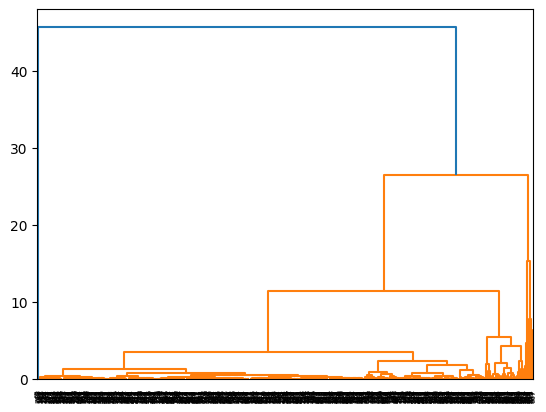

In [76]:
#Utilização de dendograma para definir o N° de Clusters
#Foi definido  a quantidade de 2 Clusters
dendrograma = dendrogram(linkage(X_base, method = 'ward'))

In [77]:
#Aplicação do Modelo Agrupamento Hierárquico
hc_base = AgglomerativeClustering(n_clusters=2, linkage = 'ward')
rotulos_hc = hc_base.fit_predict(X_base)

In [78]:
grafico_hierarquico = px.scatter( x = X_base[:,0], y = X_base[:,1], color = rotulos_hc)
grafico_hierarquico.show()


### DBSCAN

In [79]:
#Aplicação do Modelo DBSCAN, utilizando os parâmetros 'eps' e 'min_samples' no padrão
dbscan_base = DBSCAN(eps = 0.5, min_samples=5)
dbscan_base.fit(X_base)

DBSCAN()

In [80]:
#Rótulos gerado pelo algoritmo
rotulos_dbscan = dbscan_base.labels_
rotulos_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [81]:
#Plotagem DBSCAN
grafico_dbscan = px.scatter(x = X_base[:,0], y = X_base[:,1], color = rotulos_dbscan)
grafico_dbscan.show()

## Escolha do melhor modelo

#### Observa-se que o K-Means foi melhor aplicado, pois nesse modelo foram apresentados três grupos distintos, sendo que o terceiro grupo é representado pelo outlier. Com isso, podemos ver que há trÊs grupos distintos com características distintas, enquanto os demais modelos nos mostra apenas dois grupos.